In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ln -s /content/drive/MyDrive/Aktualne/MIW_letnie_2021/Zajecia/dan_pro_4 dan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import builtins

In [ ]:
#utworzyc model, wytrenowac i przetestowac
#pomanipulowac iloscia neuronow, warstw, funkcji aktywacji, wspolczynikiem uczenia i iloscia epok

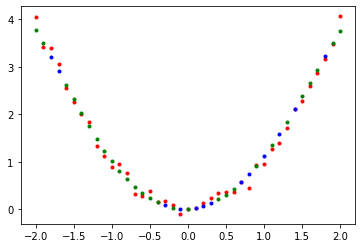

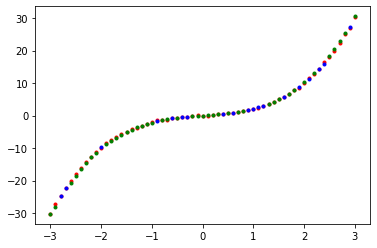

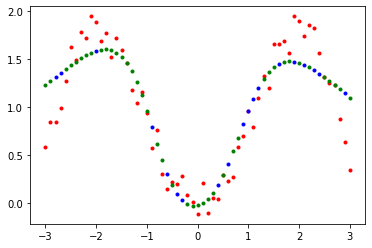

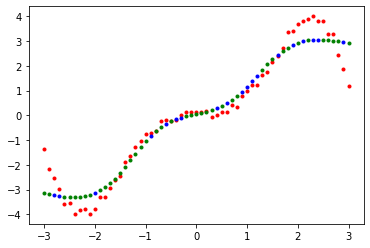

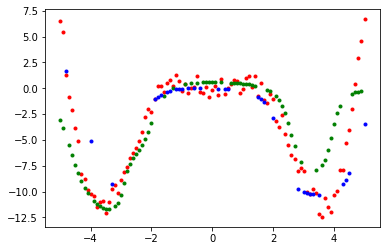

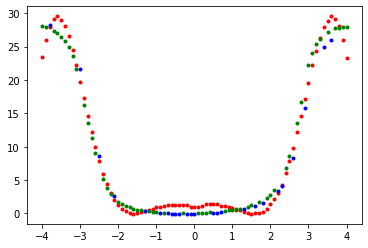

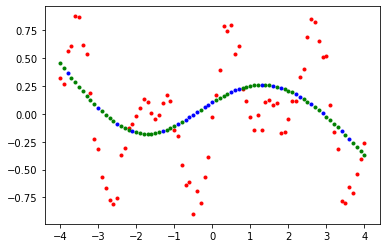

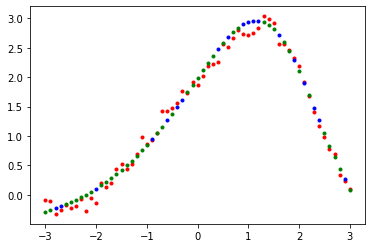

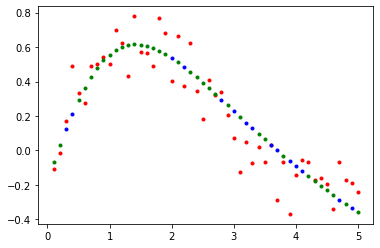

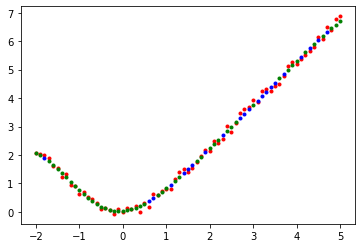

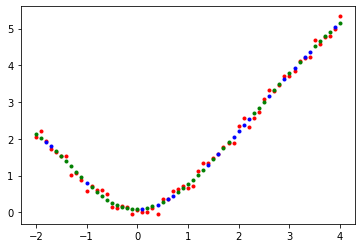

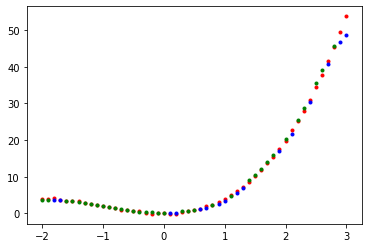

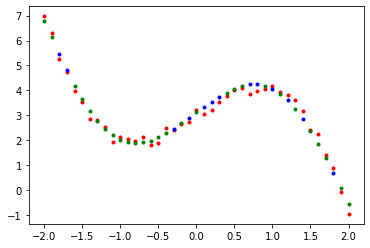

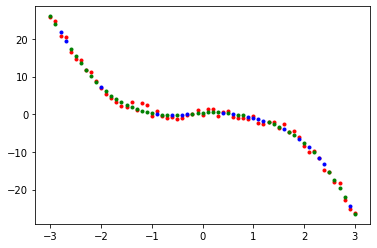

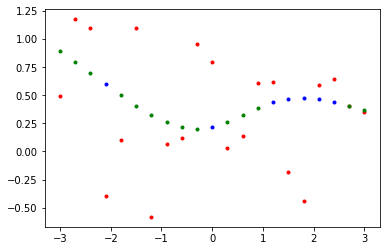

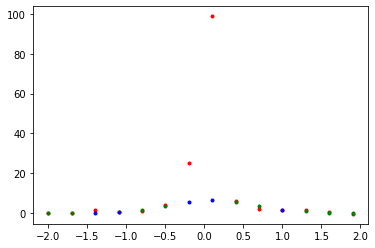

In [ ]:
x=16
for i in range(x):
    file = np.loadtxt("/content/drive/MyDrive/Dane/dane"+ str(i+1)+ ".txt")
    X, y = np.split(file, [-1], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    X = np.transpose(X)
    y = np.transpose(y)
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)
    y_train = np.transpose(y_train)
    y_test = np.transpose(y_test)

    S1=20;
    W1 = np.array(np.random.rand(S1, 1) - 0.5);
    B1 = np.array(np.random.rand(S1, 1) - 0.5);
    W2 = np.array(np.random.rand(1, S1) - 0.5);
    B2 = np.array(np.random.rand(1,1) - 0.5);
    lr = 0.001;

    for epoka in range(5000):
        #odpowiedz sieci
        A1 = np.arctan(W1@X_train + B1@np.ones((1,len(X_train[0]))))
        A2 = W2@A1 + B2

        #propagacja wsteczna
        E2 = y_train-A2
        E1 = np.transpose(W2)@E2

        dW2 = lr*E2@np.transpose(A1)
        dB2 = lr*E2@np.transpose(np.array(np.ones(E2[0].size)))
        dW1 = lr* 1/(1+A1*A1)*E1@np.transpose(X_train)
        dB1 = lr* 1/(1+A1*A1)*E1@np.transpose(np.ones(X_train[0].size).reshape(-1, X_train[0].size))

        W2 = W2+dW2
        B2 = B2+dB2
        W1 = W1+dW1
        B1 = B1+dB1

    plt.plot(X, y, 'r.')
    plt.plot(X_train, A2, 'g.')

    A1 = np.arctan(W1@X_test + B1@np.ones((1,len(X_test[0]))))
    A2 = W2@A1 + B2

    plt.plot(X_test, A2, 'b.')
    plt.show()

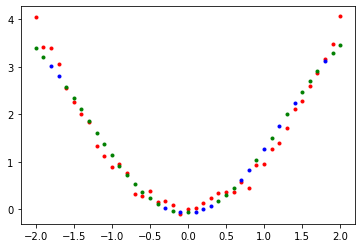

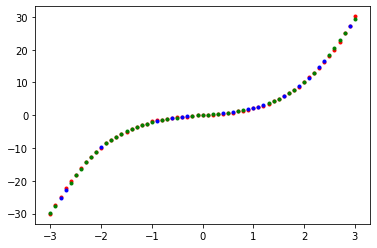

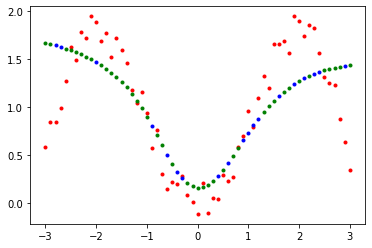

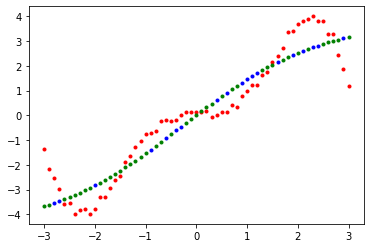

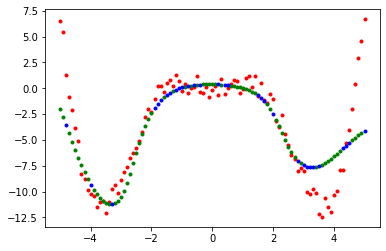

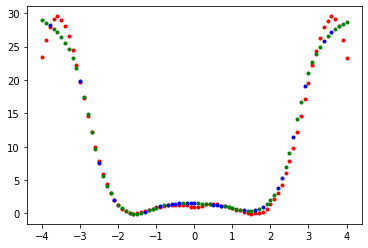

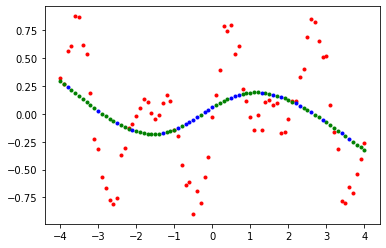

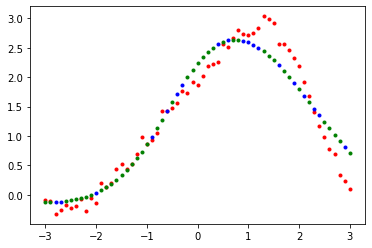

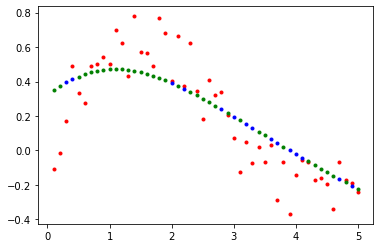

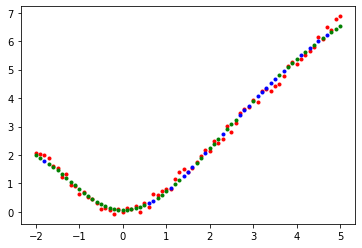

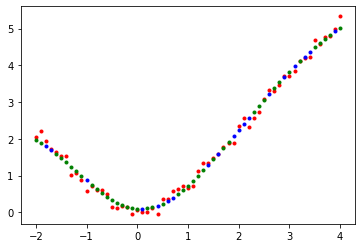

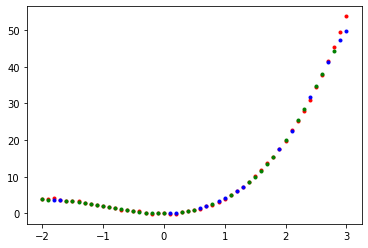

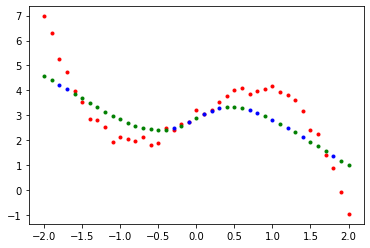

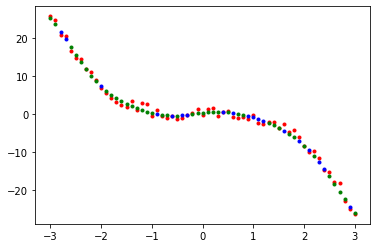

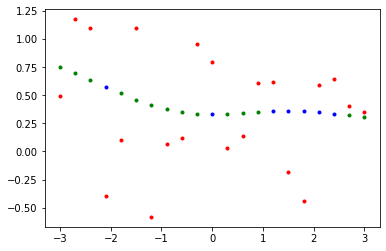

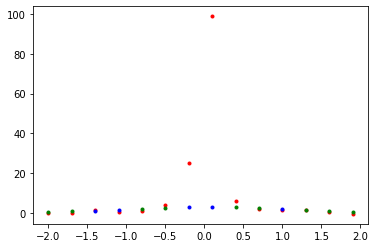

In [ ]:
x = 16
for i in range(x):
  file = np.loadtxt("/content/drive/MyDrive/Dane/dane"+ str(i+1)+ ".txt")
  X, y = np.split(file, [-1], axis=1)
  plt.plot(X, y, 'r.')

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  S1=20;
  W1 =np.array(np.random.rand(S1, 1) - 0.5);
  B1 = np.array(np.random.rand(S1, 1) - 0.5);
  W2 = np.array(np.random.rand(1, S1) - 0.5);
  B2 = np.array(np.random.rand(1,1) - 0.5);
  lr = 0.001;

  for epoka in range(1000):
    Y2 = []
    Y1 = []
    for x, y in zip(X_train,y_train):
      #odpowiedz sieci
      A1 = np.arctan(W1*x + B1)
      A2 = W2@A1 + B2

      #propagacja wsteczna
      E2 = y-A2
      E1 = np.transpose(W2)@E2
      for i in range(W2.size):
        dW2 = lr*E2 * A1[i][0]
        dB2 = lr*E2
        dW1 = lr* 1/(1+A1[i][0]*A1[i][0])*E1[i][0] * x
        dB1 = lr* 1/(1+A1[i][0]*A1[i][0])*E1[i][0]

        W2[0][i] = W2[0][i]+dW2
        B2 = B2+dB2
        W1[i][0] = W1[i][0]+dW1
        B1[i][0] = B1[i][0]+dB1


  for x, y in zip(X_train, y_train):
    A1 = np.arctan(W1*x + B1)
    A2 = W2@A1 + B2
    Y1.append(A2[0][0])
  
  plt.plot(X_train, Y1, 'g.')

  for x, y in zip(X_test, y_test):
    A1 = np.arctan(W1*x + B1)
    A2 = W2@A1 + B2
    Y2.append(A2[0][0])  

  plt.plot(X_test, Y2, 'b.')
  plt.show()  
    

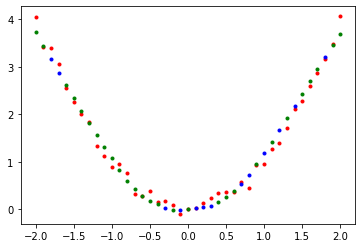

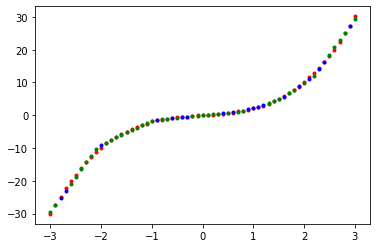

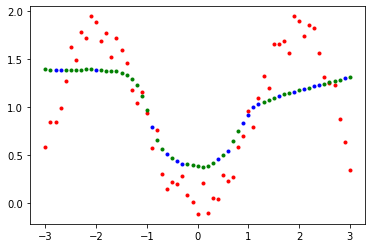

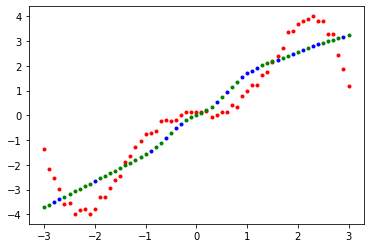

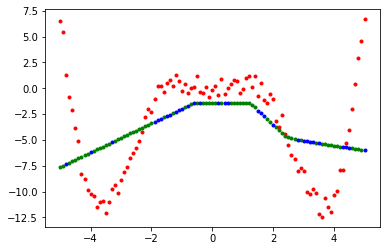

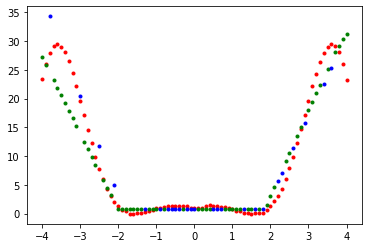

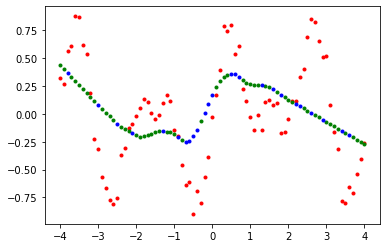

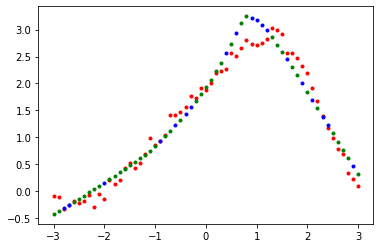

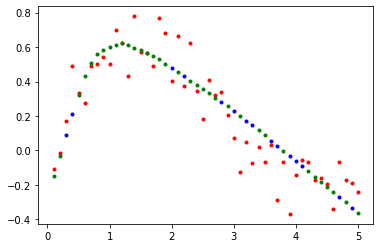

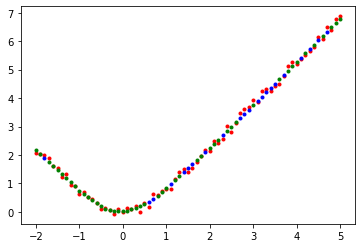

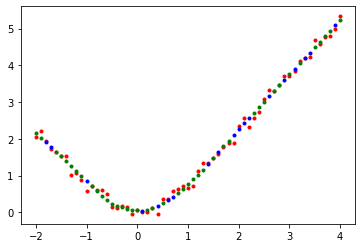

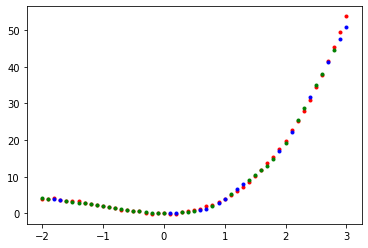

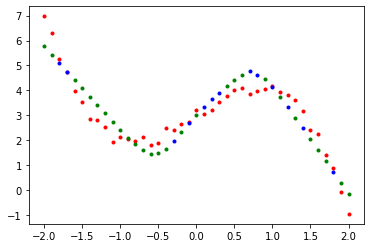

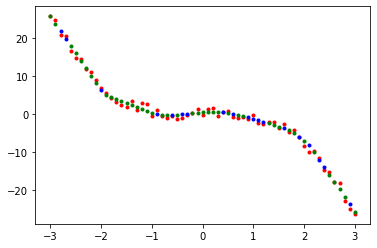

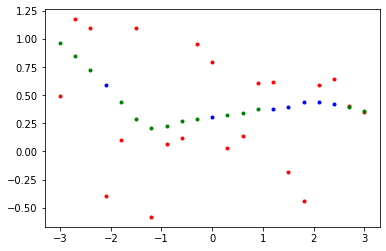

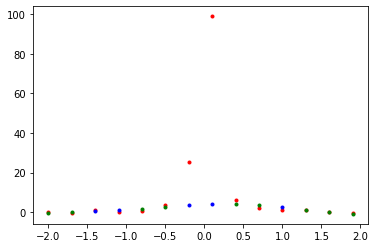

In [ ]:
x=16
for i in range(x):
    file = np.loadtxt("/content/drive/MyDrive/Dane/dane"+ str(i+1)+ ".txt")
    X, y = np.split(file, [-1], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    X = np.transpose(X)
    y = np.transpose(y)
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)
    y_train = np.transpose(y_train)
    y_test = np.transpose(y_test)

    S1 = 65
    W1 = np.array(np.random.rand(S1, 1) - 0.5) 
    B1 = np.array(np.random.rand(S1, 1) - 0.5) 
    W2 = np.array(np.random.rand(1, S1) - 0.5) 
    B2 = np.array(np.random.rand(1, 1) - 0.5)

    for e in range(5000):
      #odpowiedz sieci
      x = W1@X_train + B1@np.ones((1,len(X_train[0])))
      A1 = np.maximum(x,0)
      A2 = W2@A1 + B2

      #propagacja wsteczna
      E2 = y_train - A2
      E1 = np.transpose(W2)@E2

      dW2 = lr*E2@np.transpose(A1)
      dB2 = lr*E2@np.transpose(np.array(np.ones(E2[0].size)))
      dW1 = lr*1/(1+np.exp(-x))*E1@np.transpose(X_train)
      dB1 = lr*1/(1+np.exp(-x))*E1@np.transpose(np.ones(X_train[0].size).reshape(-1, X_train[0].size))

      W2 = W2 + dW2
      B2 = B2 + dB2
      W1 = W1 + dW1
      B1 = B1 + dB1

    plt.plot(X, y, 'r.')
    plt.plot(X_train, A2, 'g.')

    x = W1@X_test + B1@np.ones((1,len(X_test[0])))
    A1 = np.maximum(x,0)
    A2 = W2@A1 + B2

    plt.plot(X_test, A2, 'b.')
    plt.show()